# Softmax Regression on MNIST Dataset

This notebook demonstrates how to use Softmax Regression (Logistic Regression for multi-class classification) to classify handwritten digits from the MNIST dataset.


### 1. Import Required Libraries

We import standard libraries for data handling, visualization, and machine learning models.


In [1]:
import ssl
import numpy as np
import matplotlib.pyplot as plt

# Scikit-Learn imports
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
# Handle SSL certificate verification if necessary (for downloading data)
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

### 2. Load the Dataset

We use the MNIST dataset, which contains 70,000 images of handwritten digits (0-9). Each image is 28x28 pixels.


In [3]:
print("Fetching MNIST dataset...")
# Fetch the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

# Separate features (pixel data) and labels (target digit)
X_raw = mnist.data  # Feature matrix
y_raw = mnist.target # Target vector

print("Dataset fetched successfully.")

Fetching MNIST dataset...
Dataset fetched successfully.


### 3. Explore the Data

Let's check the dimensions of our data and visualize a sample image.


In [4]:
# Print data shapes
print("Shape of features (X):", X_raw.shape)
print("Shape of labels (y):", y_raw.shape)
print("\nSample labels:", y_raw[:10])

Shape of features (X): (70000, 784)
Shape of labels (y): (70000,)

Sample labels: ['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


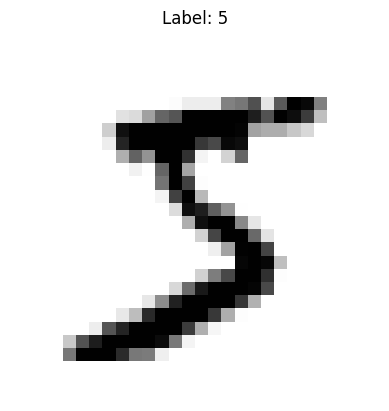

In [5]:
# Function to display an image
def plot_digit(image_data, label):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

# Visualize a random digit from the dataset
some_digit_index = 0
plot_digit(X_raw[some_digit_index], y_raw[some_digit_index])

### 4. Data Preprocessing

Steps:

1. Convert labels to integers (they are strings by default).
2. Split the data into Training and Testing sets.
3. Scale the pixel values. Pixel intensities range from 0 to 255. We scale them to 0-1 for better training stability.


In [6]:
# 1. Convert labels to integers
y = y_raw.astype(np.int8)

# 2. Split into Train and Test sets
# We typically use 60,000 for training and 10,000 for testing
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=10000, random_state=42)

# 3. Scale pixel values to range [0, 1]
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

print("Training set size:", X_train_scaled.shape)
print("Testing set size:", X_test_scaled.shape)

Training set size: (60000, 784)
Testing set size: (10000, 784)


### 5. Train the Softmax Regression Model

We use `LogisticRegression` with the `lbfgs` solver. Softmax Regression handles multi-class classification natively.


In [7]:
# Initialize Softmax Regression Model
# max_iter is increased to ensure the solver converges
softmax_reg = LogisticRegression(solver="lbfgs", random_state=42, max_iter=1000)

print("Training the model... please wait.")
# Train on the scaled training data
softmax_reg.fit(X_train_scaled, y_train)
print("Training complete.")

Training the model... please wait.
Training complete.


### 6. Evaluate the Model

We calculate the accuracy of the model on the **Test Set** (unseen data) to verify its performance.


In [8]:
# Make predictions on the test set
y_pred = softmax_reg.predict(X_test_scaled)

# Calculate Accuracy
# Correct method: Compare Predicted Labels (y_pred) with True Labels (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f} (approx {accuracy*100:.2f}%)")

Model Accuracy: 0.9198 (approx 91.98%)


Displaying Confusion Matrix...


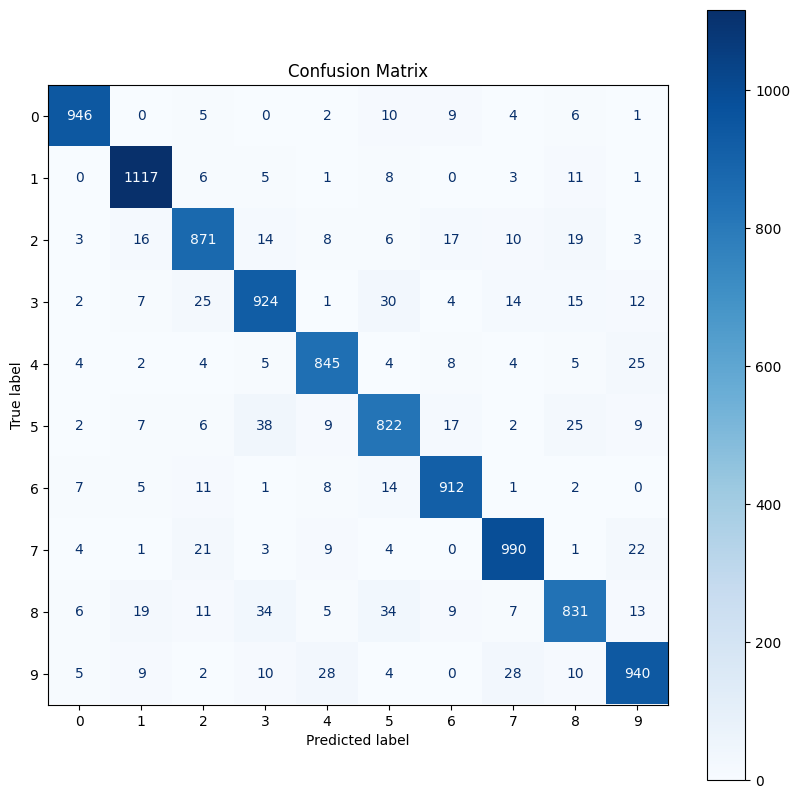

In [9]:
# Display the Confusion Matrix to visualize performance per digit
print("Displaying Confusion Matrix...")
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_estimator(softmax_reg, X_test_scaled, y_test, ax=ax, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### 7. Make Predictions on New Data

To simulate "New Data", we pick random samples from our test set and ask the model to predict them.


Predictions on randomly selected 'new' data:


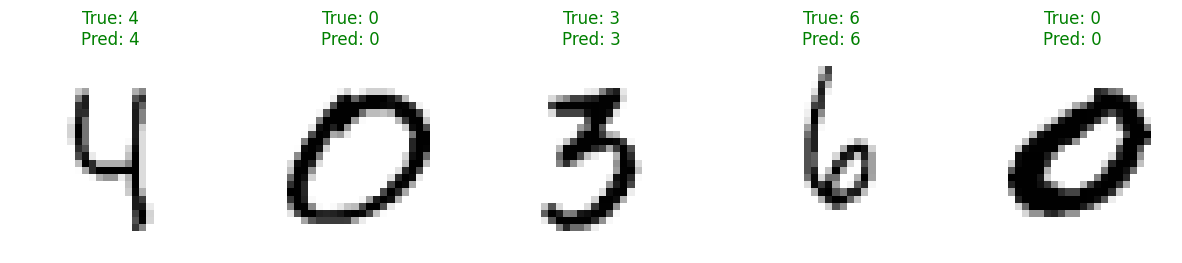

In [17]:
# Pick 5 random indices from the test set
import random
random_indices = random.sample(range(len(X_test)), 5)

print("Predictions on randomly selected 'new' data:")
plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_indices):
    # Get image and label
    image = X_test[idx]
    true_label = y_test[idx]

    # Preprocess the single image (Scale it)
    # reshape(1, -1) is needed because the model expects a batch of inputs
    image_scaled = image.reshape(1, -1) / 255.0

    # Predict
    prediction = softmax_reg.predict(image_scaled)[0]

    # Plot
    plt.subplot(1, 5, i + 1)
    image_reshaped = image.reshape(28, 28)
    plt.imshow(image_reshaped, cmap="binary", interpolation="nearest")

    color = "green" if prediction == true_label else "red"
    plt.title(f"True: {true_label}\nPred: {prediction}", color=color)
    plt.axis("off")

plt.show()